# Project One
Jose Lira 
Tuo Xin

# Problem statement
In this project, we tried to fine tune nanogpt with Donald Trump's rally speeches. We try to figure out if the model can pick up Donald Trump's speaking style. And see how large the dataset should be to avoid overfitting and produce decent result.

# Dataset
Dataset Link: https://www.kaggle.com/datasets/christianlillelund/donald-trumps-rallies

In this dataset, there are 35 speeches. We used one/five/all of them as the input to the model and benchmarked the result in the table below.

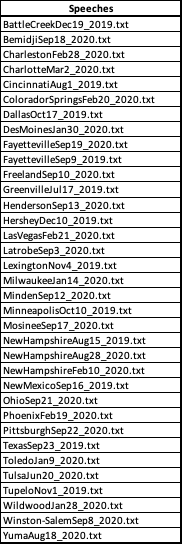

# Results

Environment

•	Windows 11

•	Python 3.10.9

•	PyTorch: torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)

•	VSCode 1.75.1

•	CUDA: 11.6, V11.6.55

•	CUDNN 11.6

•	GPU: NVIDIA GeForce RTX 2060

•	CPU: 06 Intel Core i7-10750 @2.6Ghz (12 CPUs, 32 GB RAM)

Training

We run 6 experiments in order to tune and test the nanoGPT model. The running time range from 1 hours to 6 hours using the 35 speeches and 100 iterations.





The generated text from tinetuned model with one or five speeches are not readable. Big corpus helps build a more robust model. 'The finetuned model' below refers to the model fine-tuned with 35 speeches.

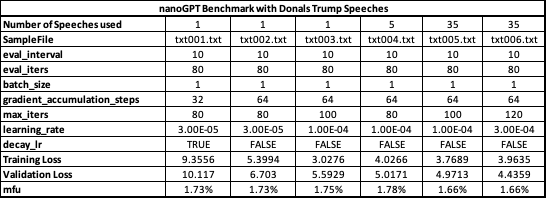

Below are the result we got from the best fine-tuned model we have vs pretrained nanogpt base model. A significant style change is observable.

The generate text from nanogpt:

In [1]:
! python sample.py --init_from=gpt2 --start="How to make America great again?"  --num_samples=1 --max_new_tokens=200

modelpy running
Overriding: init_from = gpt2
Overriding: start = How to make America great again?
Overriding: num_samples = 1
Overriding: max_new_tokens = 200
loading weights from pretrained gpt: gpt2
forcing vocab_size=50257, block_size=1024, bias=True
overriding dropout rate to 0.0
number of parameters: 123.65M
No meta.pkl found, assuming GPT-2 encodings...
How to make America great again?

This is where business owners, consultants, and business leaders come in. They deal with the issues but also have access to information from other actors who have a stake in the outcome of the 2008 campaign and those who have no business involvement with these campaigns. With that knowledge comes a greater understanding of how grassroots movements work in the public interest.

I'm going to keep the campaign to only all non-profit organizations. If organizations like the Economic Freedom Network (ERN), the California Poverty Action Network (CPAN) and others are interested in supporting candidates, 

The generated text from fine-tuned model:

In [2]:
! python sample.py --init_from=resume --start="How to make America great again?"  --num_samples=1 --max_new_tokens=200

modelpy running
Overriding: init_from = resume
Overriding: start = How to make America great again?
Overriding: num_samples = 1
Overriding: max_new_tokens = 200
number of parameters: 123.59M
No meta.pkl found, assuming GPT-2 encodings...
How to make America great again? I don't happen to do. He said, by the beginning. The next one. Great, they're going to what it's good. They're going to be seeing it, and they're going to this guy, that you. And we're going to go back and they're not a great, because is the day. So he says, which is the street who you're not going to have a great thing they don't put out of the way to have never seen. They are we could say, I don't know where they'll tell you're doing great, two and I'd have a bad. And if we can't talk about it back. We're going to take it. It's really can you know what they're going to get a very well. Great. He was a phony, and it. It's not like to the truth again, they're very much for the people. It's going to be very tough people,

# Summary

The model picked up two significant characters:
1. Use easy words: Danald Trump is famous for his habits of using easy words at the level of every kid can understand.
2. Short sentences: Compared to pretrained model trained from open webtext. Speeches contains lots of spoken short sentences.

Model Problems:
1. Speeches are not training materials as the coherence between sentences is not good, compared to novals and webtexts.
2. Filler words and repetitive phrases interupts the flow. For example: "I took you on this fantastic journey. It's so much fun. They want to impeach you. They want to do worse than that. By the way, by the way, by the way, it doesn't really feel like we're being impeached." Note that 'by the way' repeated 3 times, which badly influences a generative model.
3. We need larger dataset to produce a better model.


# Exploration

Then we put generated text to OpenAI ai text classififer that detect if a text is generated by an AI. 

Below are the results:
Link: https://platform.openai.com/ai-text-classifier

Interestingly, both generated text got the same result:
The classifier considers the text to be unclear if it is AI-generated.